In [9]:
import pandas as pd
import statsmodels.formula.api as sm

baseline_dta_file = 'baseline_student_level.dta'

baseline_csv_file = 'baseline_student_level.csv'

df_baseline_dta = pd.read_stata(baseline_dta_file)
df_baseline_dta.to_csv(baseline_csv_file, index=False)
print(f"Successfully converted '{baseline_dta_file}' to '{baseline_csv_file}'")

file_path = 'baseline_student_level.csv'

df = pd.read_csv(file_path)

# Fixing score column name
df.rename(columns={'test_socre_baseline': 'test_score_baseline'}, inplace=True)
df.to_csv(file_path, index=False)

treatment_group_column = 'treatment'
baseline_score_column = 'test_score_baseline'

# Descriptive Statistics
print("\nDescriptive Statistics of Baseline Test Scores by Treatment Group:")
print(df.groupby(treatment_group_column)[baseline_score_column].describe())

Successfully converted 'baseline_student_level.dta' to 'baseline_student_level.csv'

Descriptive Statistics of Baseline Test Scores by Treatment Group:
           count       mean        std        min        25%        50%  \
treatment                                                                 
Control    400.0  53.972268  10.358988  19.078695  46.976993  54.018992   
T1         400.0  55.094251  10.887895  25.561790  47.461980  55.058350   
T2         400.0  55.925125   9.927090  29.281214  48.797669  55.294249   

                 75%       max  
treatment                       
Control    60.541936  85.56954  
T1         62.772840  86.86542  
T2         62.921200  87.44307  


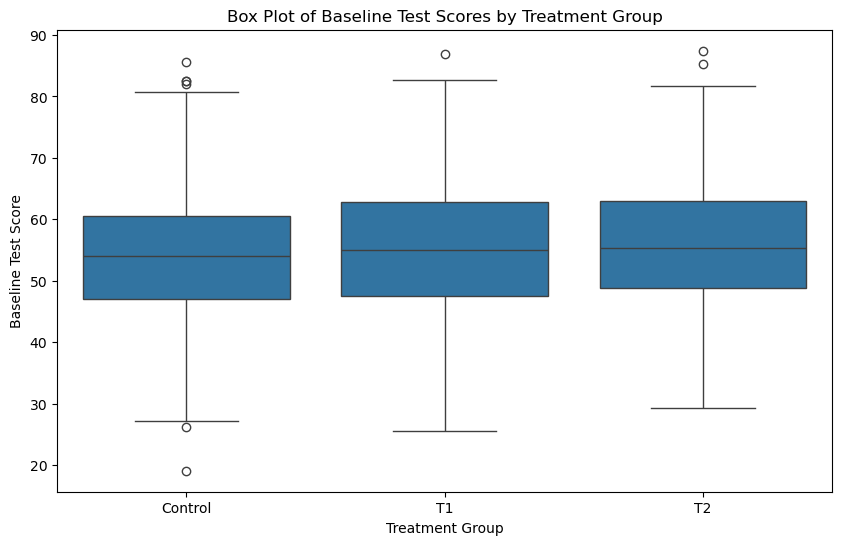

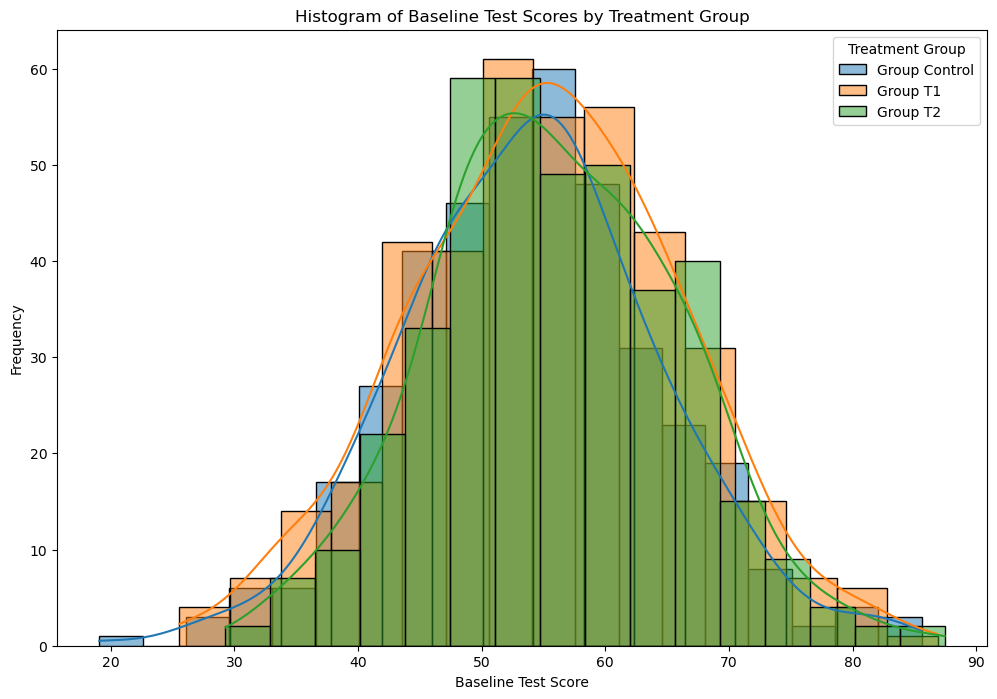

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=treatment_group_column, y=baseline_score_column, data=df)
plt.title('Box Plot of Baseline Test Scores by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Baseline Test Score')
plt.show()

# Histograms
treatment_groups = df[treatment_group_column].unique()
plt.figure(figsize=(12, 8))
for group in treatment_groups:
    subset = df[df[treatment_group_column] == group]
    sns.histplot(subset[baseline_score_column], label=f'Group {group}', kde=True)
plt.title('Histogram of Baseline Test Scores by Treatment Group')
plt.xlabel('Baseline Test Score')
plt.ylabel('Frequency')
plt.legend(title='Treatment Group')
plt.show()

In [12]:
import pandas as pd
merged_df = pd.read_csv('merged_student_data.csv')

# Creating dummy variables for treatment groups
merged_df['T1'] = (merged_df['treatment'] == 'T1').astype(int)
merged_df['T2'] = (merged_df['treatment'] == 'T2').astype(int)

# Running ANCOVA regression with dummy variables
model_dummy = smf.ols('test_score_endline ~ T1 + T2 + test_socre_baseline', data=merged_df).fit()

print(model_dummy.summary())

NameError: name 'smf' is not defined


Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
Question 3 Part B Interpretations

The estimated ANCOVA model explains approximately 79.6% of the variance in endline test scores (R-squared = 0.796), indicating a good fit to the data.

Interestingly all the results are statistically significant with a p value of 0.000.

Intercept (8.66): This is the estimated endline test score for a student in the Control group with a baseline test score of zero, assuming all other predictors are also at their reference level. Which implies that some performance increase is expected.

Treatment 1 (Coefficient = 4.74): The coefficient for Treatment 1 is positive and statistically significant. This suggests that, on average, students in Treatment group 1 scored 4.74 points higher on the endline test compared to students in the Control group, after accounting for differences in their baseline test scores. This is inline with our general assumptions about the impact of the treatment. Given higher tuition scores will increase.

Treatment 2 (Coefficient = -8.73): The highly significant negative coefficient for Treatment 2 is a noteworthy and unexpected finding. Students in Treatment group 2 performed substantially worse on the endline test compared to the Control group, even after controlling for their baseline scores. This result warrants further investigation. It could indicate that the specific intervention in Treatment 2 was not effective, or perhaps even had a detrimental effect on student performance. It's important to consider the nature of the intervention in Treatment 2 to understand potential reasons for this negative correlation.

Baseline Test Score (Coefficient = 1.02): This is also positive and also highly statistically significant with p < 0.001. This indicates a strong positive relationship between baseline and endline test scores. For every one-point increase in the baseline test score, the endline test score is estimated to increase by 1.02 points, after accounting for the treatment groups.

In [ ]:
did_dta_file = 'DiD_data.dta'
did_csv_file = 'DiD_data.csv'

df_did_dta = pd.read_stata(did_dta_file)
df_did_dta.to_csv(did_csv_file, index=False)

In [ ]:
did_csv_file = 'DiD_data.csv'
df = pd.read_csv(did_csv_file)

# Making 'post' a binary variable
df['post_binary'] = df['post'].replace({'Pre': 0, 'Post': 1}).astype(int)

# Making 'treatment' a categorical variable
df['treatment_categorical'] = df['treatment'].replace({1: 'T1', 2: 'T2'}).fillna('Control').astype('category').cat.codes

# Creating dummy variables for Treatment 1 and Treatment 2
df['T1'] = (df['treatment_categorical'] == 1).astype(int)
df['T2'] = (df['treatment_categorical'] == 2).astype(int)

# DiD regression
model = smf.ols(
    formula="test_score ~ T1 + T2 + post_binary + post_binary:T1 + post_binary:T2 + C(school_id) + C(class_id)",
    data=df
).fit()

print(model.summary())

The statistically significant coefficient for post_binary indicates that, on average, the test scores for the control group increased by approximately 9.69 points from the pre-treatment period to the post-treatment period, after accounting for school and class fixed effects. This suggests a general positive time trend in test scores for the control group.

The coefficients for the treatment dummies in the pre-treatment period are:

T1: 1.1303 (p=0.156), which is not statistically significant at the 0.05 level.

T2: 1.9862 (p=0.013), which is statistically significant. This indicates that Treatment Group 2 had a significantly higher baseline test score (by about 1.99 points) compared to the control group.

The important features of the results are however given by the interaction terms:

post_binary:T1: 4.7646 (p<0.001). This coefficient represents the additional impact of Treatment 1 on the test scores in the post-treatment period compared to the control group's change over time. It suggests that Treatment Group 1 experienced an additional increase of about 4.76 points in their test scores due to the treatment.

post_binary:T2: -8.6897 (p<0.001). This coefficient represents the additional impact of Treatment 2 on the test scores in the post-treatment period compared to the control group's change over time. It suggests that Treatment Group 2 experienced a decrease of about 8.69 points in their test scores due to the treatment, relative to the control group's improvement, this is inline with the results from the ANCOVA resutls from before.

The coefficients for the school fixed effects school_id[T.2.0] to school_id[T.8.0]) indicate that there are statistically significant differences in average test scores across some schools compared to the reference school. The coefficient for the class fixed effect is not statistically significant at the 0.05 level.

In [17]:
# Re-running the ANCOVA regression on the stratified dataset but this time controlling for school and class. 

merged_df_stratified = pd.read_csv('merged_student_data_stratified.csv')

merged_df['T1'] = (merged_df['treatment_endline'] == 'T1').astype(int)
merged_df['T2'] = (merged_df['treatment_endline'] == 'T2').astype(int)

model_dummy = smf.ols('test_score_endline ~ T1 + T2 + test_score_baseline + C(school_id) + C(class_id)', data=merged_df).fit()

print(model_dummy.summary())

KeyError: 'treatment_endline'

The ANCOVA model shows a very high R-squared of 0.850, indicating that 85% of the variance in endline test scores is explained by the treatment groups and the baseline test score.

The coefficient for test_score_baseline is 1.0051, which is highly statistically significant at p <0.001. Suggesting a strong positive relationship between the baseline and endline test scores.

The coefficients for the treatment groups, relative to the control group, are as follows:

T1 is 12.0406 (p<0.001). This indicates that, on average, students in Treatment Group 1 scored about 12.04 points higher on the endline test compared to the control group, after controlling for their baseline test scores.

T2 is 13.6146 (p<0.001). This indicates that, on average, students in Treatment Group 2 scored about 13.61 points higher on the endline test compared to the control group, after controlling for their baseline test scores. This is a turnaround from the non-stratified dataset, which had a negative coefficient.

Both Treatment Group 1 and Treatment Group 2 had a statistically significant positive impact on students' endline test scores. This indicates that both interventions were effective in improving test outcomes compared to the control group. However, the difference between Treatment 1 and 2 in their response was not that considerable, which implies that the intervention seems to be working.

The coefficients for the school fixed effects, which is where this model diverges from the one estimated previously, show the differences in endline test scores between each of these schools and the reference school , after controlling for other variables. For instance, students in school ID 5.0 scored significantly higher (1.36 points, p=0.022) than the reference school, however this does not seem to be too insightful as quantifying 1.36 points out of 100 is difficult not to attribute to random chance.

The coefficient for the class fixed effect is not statistically significant, suggesting no significant difference in endline test scores between the two classes, after controlling for other factors.

In [ ]:
did_csv_file = 'DiD_data_stratified.csv'
df = pd.read_csv(did_csv_file)

df['post_binary'] = df['post'].replace({'Pre': 0, 'Post': 1}).astype(int)
df['treatment'] = df['treatment'].astype('category')

df['T1'] = (df['treatment'] == 'T1').astype(int) # Assuming 'treatment' column now has 'T1', 'T2', 'Control'
df['T2'] = (df['treatment'] == 'T2').astype(int)

# DiD regression
model = smf.ols(
    formula="test_score ~ T1 + T2 + post_binary + post_binary:T1 + post_binary:T2 + C(school_id) + C(class_id)",
    data=df
).fit()

print(model.summary())

The estimated average test score for the control group in the pre-treatment period is approximately 54.64. The coefficient of 1.3013 (p=0.040) suggests that, on average, the test scores for the control group increased by about 1.30 points from the pre-treatment to the post-treatment period, after controlling for school and class.

The coefficient of 12.0382 (p<0.001) is the DiD estimate for Treatment 1. It indicates that Treatment Group 1 experienced an additional increase of approximately 12.04 points in their test scores from the pre-treatment to the post-treatment period, compared to the control group. The coefficient of 13.6128 (p<0.001) is the DiD estimate for Treatment 2. It indicates that Treatment Group 2 experienced an additional increase of approximately 13.61 points in their test scores from the pre-treatment to the post-treatment period, compared to the control group, this again is different from the first test, where the coefficient was negative for T2. Similar to the previous DiD model, some school fixed effects are statistically significant, indicating differences in average test scores across schools. The class fixed effect is not significant at the 0.05 level.

The estimated treatment effects for both T1 (12.04) and T2 (13.61) from this DiD model are consistent with the coefficients obtained from the second ANCOVA model (T1: 12.04, T2: 13.61), which controlled for school and class fixed effects. This consistency across different methodologies (ANCOVA and DiD) when properly specified strengthens the confidence in these findings.

The results from this second DiD model now show positive and significant effects for both treatments, which contrasts with the negative effect observed for Treatment 2 in the first ANCOVA DiD attempts. This suggests that controlling for school and class differences is crucial for accurately estimating the treatment effects in this context.

The initial round of analyses, consisting of an ANCOVA model without explicit controls for school and class and the DiD regression, presented a mixed picture of the treatment effects. Both models indicated a positive impact of Treatment 1 on test scores. However, a surprising finding was the statistically significant negative impact of Treatment 2 in both analyses. The first ANCOVA suggested that Treatment 2 led to lower endline scores, while the DiD results suported these findings. These results were counterintuitive and raised questions about the effectiveness of Treatment 2.

The second round of experiments involved analyzing data from a stratified sample, with a focus on controlling for school and class level differences. The second ANCOVA model, which included fixed effects for schools and classes, revealed a significantly different outcome. Both Treatment 1 and Treatment 2 showed substantial positive impacts on endline test scores, with Treatment 2 exhibiting a slightly larger effect than Treatment 1. Similarly, the second DiD regression also demonstrated positive and significant additional increases in test scores for both Treatment 1 and Treatment 2 over time, relative to the control group.

The implementation of stratification clearly played a crucial role in changing the observed results, particularly for Treatment 2. The negative impact seen in the initial analyses was completely reversed to a strong positive impact in the analyses of the stratified data. Furthermore, the magnitude of the positive effect for Treatment 1 also increased. This indicates that the initial findings were likely confounded by factors related to the structure of the data that were not adequately addressed without stratification and the inclusion of school and class controls.

The stratification strategy, which aimed to ensure a more balanced distribution of students with different characteristics across the treatment groups. By subsequently controlling for school and class fixed effects in the ANCOVA and DiD models, the analyses were able to account for pre-existing differences in student performance or other contextual factors at these levels. The reversal of the Treatment 2 effect suggests that, in the non-stratified analyses, Treatment 2 might have been inadvertently associated with lower-performing schools or classes, leading to the spurious negative correlation. Stratification and the inclusion of fixed effects helped to isolate the true effect of the treatment by accounting for this underlying structure and potential imbalances.